<a href="https://colab.research.google.com/github/arezyhs/Interpolasi-Lagrange/blob/main/Lagrange_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Studi Kasus: Prediksi Emisi CO₂ dengan Interpolasi Lagrange

Dalam studi kasus ini, kita menerapkan **Interpolasi Lagrange** untuk memprediksi emisi CO₂ berdasarkan konsumsi listrik dari bahan bakar fosil. Metode ini membantu kita memahami bagaimana interpolasi polinomial dapat digunakan untuk memperkirakan data di antara titik-titik yang ada.

## 📌 Langkah-Langkah Implementasi

### 1️⃣ Data Input
Dataset yang digunakan adalah:
- **`electricity_data`**: Data konsumsi listrik dari bahan bakar fosil dalam satuan TWh.
- **`co2_emission_data`**: Data emisi CO₂ terkait dalam satuan kiloton (kt).

### 2️⃣ Fungsi Pembentukan Polinomial Lagrange
Fungsi `lagrange_polynomial` digunakan untuk membentuk polinomial Lagrange secara simbolik menggunakan **SymPy** berdasarkan titik data terdekat yang dipilih. Fungsi ini membantu membentuk polinomial interpolasi yang digunakan untuk memprediksi emisi CO₂ pada titik target.

### 3️⃣ Interpolasi Lagrange
Fungsi `lagrange_interpolation` menghitung nilai interpolasi pada titik target tertentu (`x_target`) untuk berbagai orde.
- Dengan memilih titik-titik terdekat sesuai dengan orde interpolasi, hasil prediksi bisa menjadi lebih akurat dan relevan dengan data sekitar titik target.
  
### 4️⃣ Evaluasi Prediksi dan Galat
Untuk setiap orde interpolasi, kita menghitung nilai prediksi pada titik data yang ada dan mengukur galatnya (selisih dengan nilai aktual).
- Hasil prediksi dan galatnya ditampilkan dalam tabel per orde interpolasi.
  
### 5️⃣ Metrik Evaluasi Error
Untuk setiap orde interpolasi, kita menghitung metrik evaluasi berikut:
- **Error Relatif**: Persentase rata-rata dari galat relatif.
- **Korelasi Pearson (R)**: Menunjukkan korelasi antara nilai aktual dan prediksi.
- **R-Squared**: Koefisien determinasi, menunjukkan seberapa baik model mendekati data.
- **MAPE**: Mean Absolute Percentage Error, mengukur kesalahan absolut dalam bentuk persentase.

### 6️⃣ Visualisasi Hasil Interpolasi
Kita membuat grafik interpolasi untuk setiap orde hingga batas maksimum yang diatur (`max_order`), beserta titik prediksi pada `x_target` untuk visualisasi yang lebih lengkap.

## 🔧 Parameter yang Dapat Diatur
- **`x_target`**: Titik prediksi (contoh: 210).
- **`max_order`**: Batas maksimum orde interpolasi yang ingin dihitung (contoh: hingga orde 3).
  
Pengaturan `max_order` dan `x_target` memudahkan dalam menentukan orde interpolasi dan titik prediksi yang diinginkan.

## 📈 Hasil dan Output

### 📊 Hasil Prediksi dan Galat untuk Setiap Orde
Untuk setiap orde dari 1 hingga `max_order`, hasil prediksi, galat, dan evaluasi error ditampilkan dalam tabel per orde. Hal ini memudahkan perbandingan antar orde dan memahami seberapa baik interpolasi pada setiap orde dalam mendekati data asli.

### 📉 Grafik Interpolasi
Grafik interpolasi menampilkan:
- **Kurva interpolasi untuk setiap orde** dari 1 hingga `max_order`.
- **Titik prediksi pada `x_target`** untuk setiap orde, dengan label hasil prediksi.
- **Titik data asli** sebagai acuan untuk visualisasi.

---

## 📂 Referensi Fungsi Utama
- **`lagrange_polynomial(x_values, y_values)`**: Membentuk polinomial Lagrange secara simbolis.
- **`lagrange_interpolation(x_values, y_values, x_target, order)`**: Menghitung nilai interpolasi untuk titik target dengan orde tertentu.
- **Tabel Evaluasi Error**: Memberikan evaluasi metrik error seperti Error Relatif, Korelasi Pearson (R), R-Squared, dan MAPE.

---

## 📌 Kesimpulan Studi Kasus
Studi ini menunjukkan bahwa **Interpolasi Lagrange dapat memberikan estimasi yang baik pada rentang data yang tersedia**. Kesimpulan utama adalah:
- **Orde yang Lebih Tinggi**: Memberikan hasil yang lebih baik pada data asli tetapi mungkin lebih rentan terhadap osilasi pada interval di luar rentang data.
- **Evaluasi Metrik Error**: Memberikan gambaran praktis mengenai akurasi model dalam pendekatan interpolasi.
- **Pemilihan Orde yang Optimal**: Orde lebih rendah sering kali cukup stabil dan dapat memberikan hasil yang baik dalam rentang data terbatas, sementara orde lebih tinggi memberikan ketelitian lebih baik pada data yang ada namun dapat rentan terhadap overfitting.

---

**Author:** Arezyhs


Tabel Hasil Prediksi dan Galat untuk Orde 1 berdasarkan Interpolasi Lagrange:
   Electricity (TWh)    Y Aktual  Y Prediksi Orde 1  Galat Orde 1
0           189.6600 447940.0024        474454.2785    26514.2761
1           203.1100 483910.0037        483910.0037        0.0000
2           209.7100 488549.9878        488549.9878        0.0000
3           217.9700 482510.0098        494356.9982    11846.9884
4           222.6400 517320.0073        497640.1385    19679.8688
5           235.4100 576989.9902        506617.8047    70372.1855
6           247.3900 619840.0269        515040.0788   104799.9481

Evaluasi Error untuk Orde 1:
  Error Relatif (%)    : 5.90%
  Korelasi Pearson (R) : 0.9526
  R-Squared            : 0.9074
  MAPE (%)             : 5.90%
--------------------------------------------------

Tabel Hasil Prediksi dan Galat untuk Orde 2 berdasarkan Interpolasi Lagrange:
   Electricity (TWh)    Y Aktual  Y Prediksi Orde 2  Galat Orde 2
0           189.6600 447940.0024        4

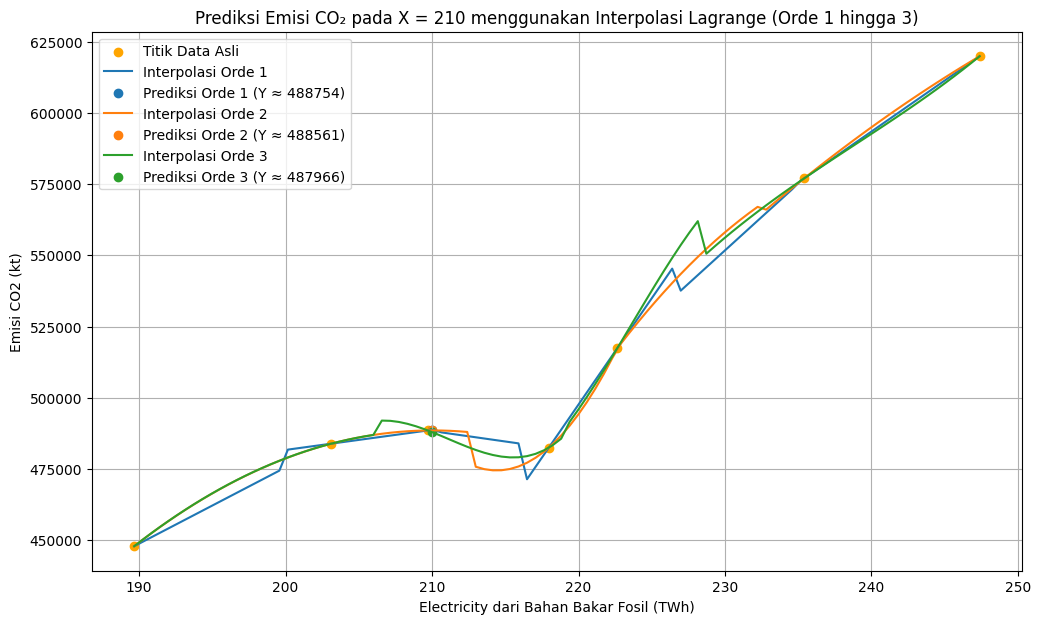

In [29]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
from decimal import Decimal, getcontext

# Set precision untuk Decimal dan pengaturan tampilan pandas
getcontext().prec = 6
pd.options.display.float_format = '{:.4f}'.format

# Data untuk Electricity (TWh) dan CO2 Emission (Metrics Ton per Capita)
electricity_data = np.array([189.66, 203.11, 209.71, 217.97, 222.64, 235.41, 247.39])
co2_emission_data = np.array([447940.0024, 483910.0037, 488549.9878, 482510.0098, 517320.0073, 576989.9902, 619840.0269])

# Membuat variabel simbolik untuk x
x = sp.symbols('x')

# Fungsi untuk membentuk polinomial Lagrange simbolik berdasarkan titik terdekat
def lagrange_polynomial(x_values, y_values):
    n = len(x_values)
    polynomial = 0
    for i in range(n):
        term = y_values[i]
        for j in range(n):
            if i != j:
                term *= (x - x_values[j]) / (x_values[i] - x_values[j])
        polynomial += term
    return sp.simplify(polynomial)

# Fungsi interpolasi polinomial Lagrange
def lagrange_interpolation(x_values, y_values, x_target, order):
    # Pilih titik-titik terdekat sejumlah order + 1
    idx = np.argsort(np.abs(x_values - x_target))[:order + 1]
    x_selected = x_values[idx]
    y_selected = y_values[idx]

    # Membentuk polinomial Lagrange untuk titik terpilih
    lagrange_poly = lagrange_polynomial(x_selected, y_selected)
    # Evaluasi polinomial Lagrange pada x_target
    interpolated_value = sp.lambdify(x, lagrange_poly, 'numpy')(x_target)
    return interpolated_value, lagrange_poly

# Menentukan hingga orde berapa interpolasi dilakukan
max_order = 3  # atur orde

# Nilai x target untuk prediksi
x_target = 210  # atur nilai x prediksi

# Melakukan interpolasi Lagrange untuk x_target hingga max_order
higher_order_predictions = {}
lagrange_polynomials = {}

# Menyimpan tabel hasil untuk tiap orde dalam dictionary
results_tables = {}

for order in range(1, max_order + 1):
    # Prediksi dan persamaan polinomial untuk x_target
    prediction, poly = lagrange_interpolation(electricity_data, co2_emission_data, x_target, order)
    higher_order_predictions[order] = prediction
    lagrange_polynomials[order] = poly

    # Hitung Y prediksi dan galat untuk setiap X dalam data
    y_pred = np.array([sp.lambdify(x, lagrange_polynomials[order], 'numpy')(xi) for xi in electricity_data])
    galat = np.abs(co2_emission_data - y_pred)

    # Membuat tabel per orde dengan format galat tanpa notasi ilmiah
    results_table = pd.DataFrame({
        "Electricity (TWh)": electricity_data,
        "Y Aktual": co2_emission_data,
        f"Y Prediksi Orde {order}": y_pred,
        f"Galat Orde {order}": galat
    }).round(6)  # Pembulatan untuk menghindari notasi ilmiah
    results_tables[order] = results_table

    # Menampilkan tabel untuk setiap orde
    print(f"\nTabel Hasil Prediksi dan Galat untuk Orde {order} berdasarkan Interpolasi Lagrange:")
    print(results_table)

    # Menghitung metrik error untuk orde ini
    y_actual = results_table["Y Aktual"].values
    error_relatif = np.mean(galat / y_actual) * 100
    R = np.corrcoef(y_actual, y_pred)[0, 1]
    R_squared = R ** 2
    MAPE = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

    print(f"\nEvaluasi Error untuk Orde {order}:")
    print(f"  Error Relatif (%)    : {error_relatif:.2f}%")
    print(f"  Korelasi Pearson (R) : {R:.4f}")
    print(f"  R-Squared            : {R_squared:.4f}")
    print(f"  MAPE (%)             : {MAPE:.2f}%")
    print("-" * 50)

# Display hasil prediksi, persamaan polinomial, dan batas error Lagrange
print("\nHasil Prediksi dan Persamaan Polinomial Lagrange untuk X Prediksi dengan Berbagai Orde:")
for order in range(1, max_order + 1):
    print(f"\nOrde {order}:")
    print(f"  Prediksi untuk X = {x_target} adalah {higher_order_predictions[order]:.5f}")
    print("  Persamaan Polinomial Lagrange:")
    sp.pprint(lagrange_polynomials[order])
    print("\n" + "-"*50)

# Plotting
plt.figure(figsize=(12, 7))
plt.scatter(electricity_data, co2_emission_data, color='orange', label='Titik Data Asli')
x_range = np.linspace(min(electricity_data), max(electricity_data), 100)

# Menghitung dan menampilkan nilai interpolasi untuk setiap orde hingga max_order
for order in range(1, max_order + 1):
    y_interp = [lagrange_interpolation(electricity_data, co2_emission_data, x, order)[0] for x in x_range]
    plt.plot(x_range, y_interp, label=f'Interpolasi Orde {order}')
    plt.scatter(x_target, higher_order_predictions[order], label=f'Prediksi Orde {order} (Y ≈ {higher_order_predictions[order]:.0f})')

plt.xlabel('Electricity dari Bahan Bakar Fosil (TWh)')
plt.ylabel('Emisi CO2 (kt)')
plt.title(f'Prediksi Emisi CO₂ pada X = {x_target} menggunakan Interpolasi Lagrange (Orde 1 hingga {max_order})')
plt.legend()
plt.grid(True)
plt.show()